## CMPE 346 Project
Tarık Emre Talay - 118200077

Yunus Emre Şimşek - 118200085

Muhammed Emin Göksu - 119200050

The difference between 2 generating results is;

We fine-tuned gpt2 Turkish Version with Turkish Sport News Headlines Data. So after fine-tuning, results changed in a news headline way; more short and new thematic way

### Import and Install Part

In [1]:
!pip install transformers==4.28.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.0 MB/s eta 0:00:00


In [2]:
!pip install git+https://github.com/huggingface/accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-5el_a8rw
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-5el_a8rw
  Resolved https://github.com/huggingface/accelerate to commit 3f2b5da094f03994b35b91516f18917bc77b3b52
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for accelerate: filename=accelerate-0.20.0.dev0-py3-none-any.whl size=227580 sha256=cd62a3cd518db07feea616d874d7aa0a6e0d9053544ae0b7469881a99db1b978
  Stored in directory: /tmp/pip-ephem-wheel-cache-idphiu9z/wheels/f6/c7/9d/1b8a5ca8353d9307733bc719107acb67acdc95063bba749f26
Successfully built accelerate


In [3]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 22.8 MB/s eta 0:00:00


### We took Turkish sport news data which consist of 600 row data

In [4]:
import pandas as pd

df = pd.read_excel("TurkishHeadlines.xlsx")
df_spor = df[df["ETIKET"] == "Spor"]
df_spor.head(5)

,HABERLER,ETIKET
2400,Süper Lig'in 12. haftasında Galatasaray'a konu...,Spor
2401,"Fenerbahçe, Alper Potuk'la 4 yıllık yeni sözle...",Spor
2402,"Beşiktaş, Süper Lig'de yarın deplasmanda Fener...",Spor
2403,Cavani'yle duran top konusunda sert tartışmala...,Spor
2404,"Galatasaray, Süper Lig'in 6. haftasında 24 Eyl...",Spor


In [5]:
texts = [text for text in df_spor['HABERLER']]
texts

["Süper Lig'in 12. haftasında Galatasaray'a konuk olacak olan Akdeniz ekibi Aytemiz Alanyaspor'a bir kötü haber daha geldi.",
 "Fenerbahçe, Alper Potuk'la 4 yıllık yeni sözleşme imzalanması konusunda prensip anlaşmasına varıldığını açıkladı.",
 "Beşiktaş, Süper Lig'de yarın deplasmanda Fenerbahçe ile yapacağı maçın hazırlıklarını tamamladı.",
 "Cavani'yle duran top konusunda sert tartışmalar yaşayan Neymar, Bayern Münih maçı düşünülerek Montpellier maçının kadrosuna alınmadı.",
 "Galatasaray, Süper Lig'in 6. haftasında 24 Eylül Pazar günü deplasmanda Bursaspor'la oynayacağı maçın hazırlıklarını sürdürdü.",
 "Milli tenisçi Çağla Büyükakçay, Fransa'da düzenlenen Uluslararası Tenis Federasyonu (ITF) Turnuvası'nda elendi.",
 "Süper Lig'de pazar günü Demir Grup Sivasspor deplasmanına çıkacak Göztepe, bu sezon gol attığı maçların hepsinde puan almayı başardı.",
 'Beşiktaş Başkanı Fikret Orman\'ın, "Talisca\'nın bonservisini almak istiyoruz" açıklamasının ardından nasıl bir yol izleneceği ort

In [6]:
len(texts)

600

In [6]:
from transformers import AutoConfig
from transformers import GPT2TokenizerFast, GPT2LMHeadModel

MODEL_NAME = "redrussianarmy/gpt2-turkish-cased"
tokenizer = GPT2TokenizerFast.from_pretrained(MODEL_NAME)

# the eos and bos tokens are defined
bos = '<|endoftext|>'
eos = '<|EOS|>'
pad = '<|pad|>'

special_tokens_dict = {'eos_token': eos, 'bos_token': bos, 'pad_token': pad}

# the new token is added to the tokenizer
num_added_toks = tokenizer.add_special_tokens(special_tokens_dict)

# the model config to which we add the special tokens
config = AutoConfig.from_pretrained("redrussianarmy/gpt2-turkish-cased", 
                                    bos_token_id=tokenizer.bos_token_id,
                                    eos_token_id=tokenizer.eos_token_id,
                                    pad_token_id=tokenizer.pad_token_id,
                                    output_hidden_states=False)

# the pre-trained model is loaded with the custom configuration
model = GPT2LMHeadModel.from_pretrained("redrussianarmy/gpt2-turkish-cased", config=config)

# the model embedding is resized
model.resize_token_embeddings(len(tokenizer))

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Embedding(50260, 768)

In [8]:
texts

["Süper Lig'in 12. haftasında Galatasaray'a konuk olacak olan Akdeniz ekibi Aytemiz Alanyaspor'a bir kötü haber daha geldi.",
 "Fenerbahçe, Alper Potuk'la 4 yıllık yeni sözleşme imzalanması konusunda prensip anlaşmasına varıldığını açıkladı.",
 "Beşiktaş, Süper Lig'de yarın deplasmanda Fenerbahçe ile yapacağı maçın hazırlıklarını tamamladı.",
 "Cavani'yle duran top konusunda sert tartışmalar yaşayan Neymar, Bayern Münih maçı düşünülerek Montpellier maçının kadrosuna alınmadı.",
 "Galatasaray, Süper Lig'in 6. haftasında 24 Eylül Pazar günü deplasmanda Bursaspor'la oynayacağı maçın hazırlıklarını sürdürdü.",
 "Milli tenisçi Çağla Büyükakçay, Fransa'da düzenlenen Uluslararası Tenis Federasyonu (ITF) Turnuvası'nda elendi.",
 "Süper Lig'de pazar günü Demir Grup Sivasspor deplasmanına çıkacak Göztepe, bu sezon gol attığı maçların hepsinde puan almayı başardı.",
 'Beşiktaş Başkanı Fikret Orman\'ın, "Talisca\'nın bonservisini almak istiyoruz" açıklamasının ardından nasıl bir yol izleneceği ort

In [7]:
from datasets import Dataset
from sklearn.model_selection import train_test_split

texts = [tokenizer.bos_token + " " + t + " " + tokenizer.eos_token for t in texts]
train, validation = train_test_split(texts, test_size=0.05, random_state=7)
train = Dataset.from_dict({"text": train})
validation = Dataset.from_dict({"text": validation})
train, validation

(Dataset({
     features: ['text'],
     num_rows: 570
 }),
 Dataset({
     features: ['text'],
     num_rows: 30
 }))

In [8]:
def tokenize_function(examples):
    return tokenizer(examples['text'], padding=True)

tokenized_train_dataset = train.map(
    tokenize_function,
    batched=True,
    num_proc=5,
    remove_columns=['text'],
)
tokenized_val_dataset = validation.map(
    tokenize_function,
    batched=True,
    num_proc=5,
    remove_columns=['text'],
)

tokenized_train_dataset, tokenized_val_dataset

Map (num_proc=5):   0%|          | 0/570 [00:00<?, ? examples/s]

Map (num_proc=5):   0%|          | 0/30 [00:00<?, ? examples/s]

(Dataset({
     features: ['input_ids', 'attention_mask'],
     num_rows: 570
 }),
 Dataset({
     features: ['input_ids', 'attention_mask'],
     num_rows: 30
 }))

In [9]:
tokenizer.decode(tokenized_train_dataset['input_ids'][50])

"<|endoftext|> THY Avrupa Ligi'nin 7. hafta maçında Fenerbahçe Doğuş sahasında Yunanistan'ın Olympiakos takımına uzatmada 90-83 yenildi. <|EOS|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|>"

### First we get 20 samples before the fine-tuning process and after the fine-tuning, we again get 20 different samples

In [49]:
def generate_n_text_samples(model, tokenizer, input_text, device, n_samples=5):
    text_ids = tokenizer.encode(input_text, return_tensors='pt')
    text_ids = text_ids.to(device)
    model = model.to(device)

    generated_text_samples = model.generate(
        text_ids, 
        max_length=300,
        num_return_sequences=n_samples,
        no_repeat_ngram_size=2,
        repetition_penalty=1.5,
        top_p=0.92,
        temperature=.85,
        do_sample=True,
        top_k=125,
        early_stopping= True
    )
    
    gen_text = []
    for t in generated_text_samples:
        text = tokenizer.decode(t, skip_special_tokens=True)
        gen_text.append(text)

    return gen_text


In [12]:
device = "cuda:0"

input_text = tokenizer.bos_token + " Arda Turan"
quotes = generate_n_text_samples(model, tokenizer, 
                                 input_text, device, n_samples=20)
for q in quotes:
    print(q)
    print()


 Arda Turan ve eşi Sema Hanım’ı, genç müzisyen Murat Ermiş ile birlikte ziyaret etti.
Başkan Akdemir ilk olarak söz aldığı Bursa müzik konseri için ilçeye geldi… - Dünya Gazetesi | Güncel Haberler
Türkiye genelinde yaşanan terör olayları sonrası gündeme gelen “Barış İçin Eylem Planı”nın ilkini gerçekleştiren Çanakkale Onsekiz Mart Üniversitesi Rektörü Prof Dr....ZAYIFIRDI!15 Temmuz 2016 Cuma 08:08KASTAMONU İHA'NIN HABERLERİBAHÇE AKTARCILARINA YANLIŞTU09 Ağustos 2018 Cumartesi 16:42KIRŞEHİR'de silahlı saldırıya uğrayan askerden Piyade Astsubay Üstçavuş Ahmet Taşan (22) yaralandı.....YENİÇİSTREKE REDALE 15.11 Mayıs 2015 Pazartesi 09:02GÖRENMEHAMLAN : "Çanakkale Şehit Jandarma Uzman Erbaş Aileleri Anma Gecesi"nin naaşı Mehmet Akif TAMAVAS'ta doğum yeri ilçe müftülüğünde görevli polislerden son yolculuğuna katıldı..
Bugündüzende gerçekleştirilen törene katılan askerler şehit düşen şehidin babası Ebru Kaya Karakışla Kaymakamı Cahit Demir Gökali Özgü Saygı Mermine Emniyetli Cengiz Çakar tara

In [43]:
from transformers import DataCollatorForLanguageModeling, TrainingArguments, Trainer

OUTPUT_DIR = "./results"

training_args = TrainingArguments(
    output_dir=OUTPUT_DIR,           # output directory
    num_train_epochs=10,              # total # of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    #warmup_steps=200,                # number of warmup steps for learning rate scheduler
    weight_decay=0.001,               # strength of weight decay
    logging_steps=100,
    logging_dir=OUTPUT_DIR,          # directory for storing logs
    prediction_loss_only=True,
    save_steps=10000
)

data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer,
        mlm=False
    )

In [44]:
trainer = Trainer(
    model=model,    # the instantiated  Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    data_collator=data_collator,
    train_dataset=tokenized_train_dataset,         # training dataset
    eval_dataset=tokenized_val_dataset,            # evaluation dataset
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
100,0.350700
200,0.209800
300,0.315800


TrainOutput(global_step=360, training_loss=0.2923428747389052, metrics={'train_runtime': 95.1885, 'train_samples_per_second': 59.881, 'train_steps_per_second': 3.782, 'total_flos': 174110312448000.0, 'train_loss': 0.2923428747389052, 'epoch': 10.0})

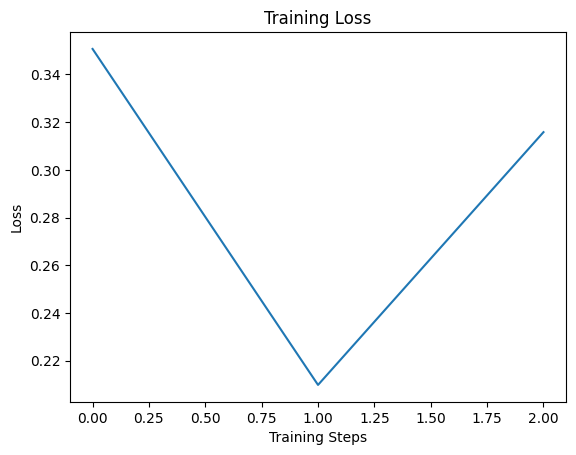

In [45]:
# Loss Graph of the Training part
import numpy as np
import matplotlib.pyplot as plt

loss_values = np.array([item['loss'] for item in trainer.state.log_history[:-1]])

# Plot the loss graph
plt.plot(loss_values)
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [46]:
trainer.save_model()
tokenizer.save_pretrained(OUTPUT_DIR)
model.save_pretrained(OUTPUT_DIR)

In [47]:
trainer.evaluate()

{'eval_loss': 3.5152699947357178,
 'eval_runtime': 0.2003,
 'eval_samples_per_second': 149.764,
 'eval_steps_per_second': 9.984,
 'epoch': 10.0}

In [50]:
# Generating samples after fine-tuning
souls_model = GPT2LMHeadModel.from_pretrained(OUTPUT_DIR)
souls_tokenizer = GPT2TokenizerFast.from_pretrained(OUTPUT_DIR)

device = "cuda:0"

input_text = souls_tokenizer.bos_token + " Arda Turan"
quotes = generate_n_text_samples(souls_model, souls_tokenizer, 
                                 input_text, device, n_samples=20)
for q in quotes:
    print(q)
    print()


 Arda Turan Barcelona'nın Atletico Madrid maçı kadrosuna alınmadı 

 Arda Turan Barcelona'nın Atletico Madrid maçı kadrosuna alınmadı 

 Arda Turan transferinde taşlar yerine oturuyor, milli yıldız adım adım yuvaya dönüyor. 

 Arda Turan Barcelona'nın Atletico Madrid maçı kadrosuna alınmadı 

 Arda Turan transferinde taşlar yerine oturuyor, milli yıldız adım adım yuvaya dönüyor. 

 Arda Turan transferinde taşlar yerine oturuyor, milli yıldız adım adım yuvaya dönüyor. 

 Arda Turan transferinde taşlar yerine oturuyor, milli yıldız adım adım yuvaya dönüyor. 

 Arda Turan için ayrılık iddiası! Satış listesinde... 

 Arda Turan için ayrılık iddiası! Satış listesinde... 

 Arda Turan için ayrılık iddiası! Satış listesinde... 

 Arda Turan için ayrılık iddiası! Satış listesinde... 

 Arda Turan transferinde taşlar yerine oturuyor, milli yıldız adım adım yuvaya dönüyor. 

 Arda Turan Barcelona'nın Atletico Madrid maçı kadrosuna alınmadı 

 Arda Turan Barcelona'nın Atletico Madrid maçı kadrosu